<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/chennai_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chennai House Price Prediction**

**Problem Statement**

  Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?







**Minimum Requirements**

  It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

**Objective**

  The model must be analysed to find the importants pf the Sales Price







# importing the Dependancies


In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filtering the warning errors
import warnings
warnings.filterwarnings('ignore')

**Data Collection and Pre-Processing**

In [3]:
#Data load and view
file_path="/content/train-chennai-sale.csv"
df=pd.read_csv(file_path)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
#checking duplicates value in DataFrame
df.duplicated().sum()

0

In [5]:
#Checking how many rows and columns
df.shape

(7109, 22)

In [6]:
# information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
# verified the Null value in DataFrame
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
#Describe All Columns
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [9]:
#Fill The Null values
# Fill the null value choose the MODE value of df['N_BEDROOM']
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
# Convert to the float to int dtype
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)



In [10]:
# Fill the null value choose the MODE value
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df.N_BATHROOM.mode()[0])
# Convert to the float to int dtype
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)
# Fill the null value choose the MODE value
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df.QS_OVERALL.mode()[0])

In [11]:
#checking null values
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
#View the shape of DataFrame
df.shape

(7109, 22)

# Categorical Spelling check

In [13]:
#select the object in the DataFrame
df.select_dtypes(['object'])

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Others,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


In [14]:
df.groupby(df['AREA'])['AREA'].count()

AREA
Adyar          773
Adyr             1
Ana Nagar        3
Ann Nagar        2
Anna Nagar     783
Chormpet         6
Chrmpet          6
Chrompet      1681
Chrompt          9
KK Nagar       996
KKNagar          1
Karapakam        3
Karapakkam    1363
T Nagar        496
TNagar           5
Velachery      979
Velchery         2
Name: AREA, dtype: int64

SELECT THE PARTICULAR SPELLING MISSING AREA AND CORRECTION ALL AREAS


In [15]:

df['AREA'].replace('Adyr','Adyar',inplace=True)

df['AREA'].replace({'Chormpet':'Chrompet','Chrmpet':'Chrompet','Chrompt':'Chrompet'},inplace=True)

df['AREA'].replace('KKNagar','KK Nagar',inplace=True)

df['AREA'].replace('Karapakam','Karapakkam',inplace=True)

df['AREA'].replace('TNagar','T Nagar',inplace=True)

df['AREA'].replace('Velchery','Velachery',inplace=True)

df['AREA']=df['AREA'].replace({'Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar'})

In [16]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

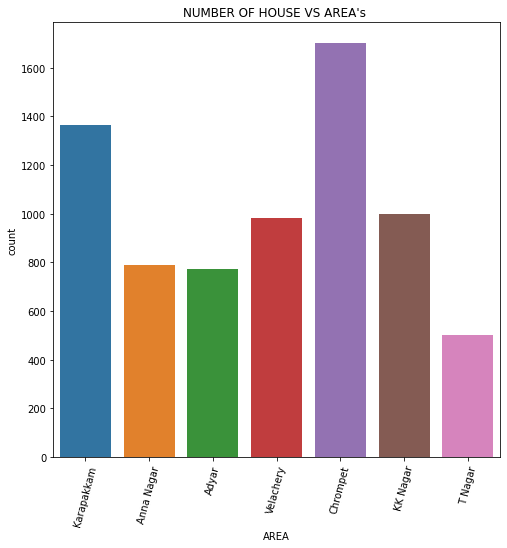

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(x='AREA',data=df)
plt.title("NUMBER OF HOUSE VS AREA's ")
plt.xticks(rotation=75)
plt.show()

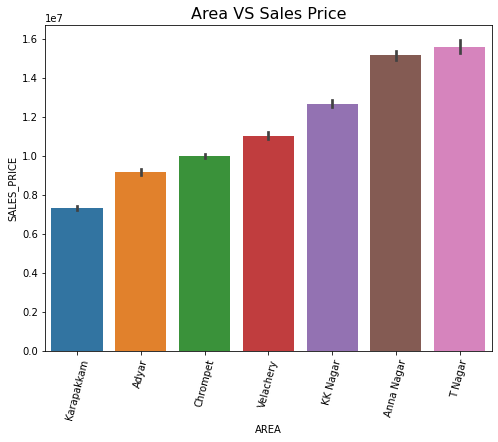

In [19]:
#Area VS Sales Price order wise
plt.figure(figsize=(8,6))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Area VS Sales Price',size=16)
plt.xticks(rotation=75)
plt.show()

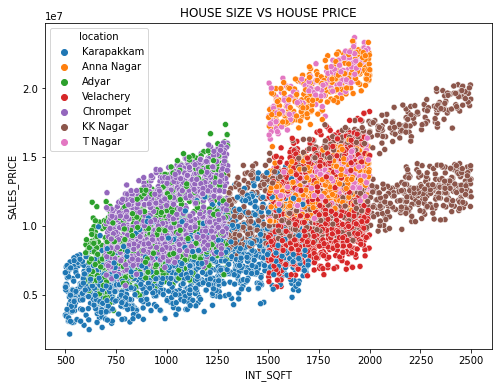

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df,hue='AREA')
plt.title('HOUSE SIZE VS HOUSE PRICE')
plt.legend(title='location')
plt.show()

In [718]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

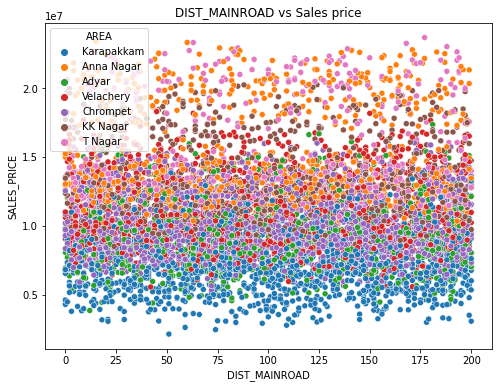

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,hue='AREA')
plt.title('DIST_MAINROAD vs Sales price')
plt.show()

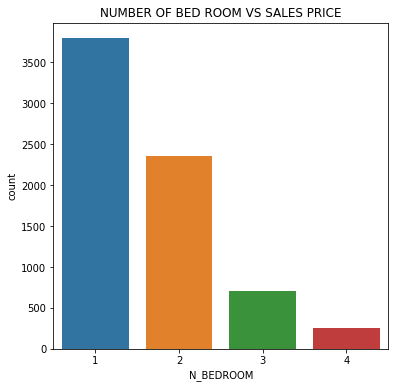

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x=df.N_BEDROOM,data=df)
plt.title('NUMBER OF BED ROOM VS SALES PRICE')
plt.show()

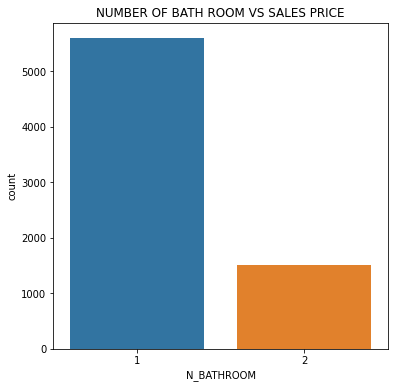

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x=df.N_BATHROOM,data=df)
plt.title('NUMBER OF BATH ROOM VS SALES PRICE')
plt.show()

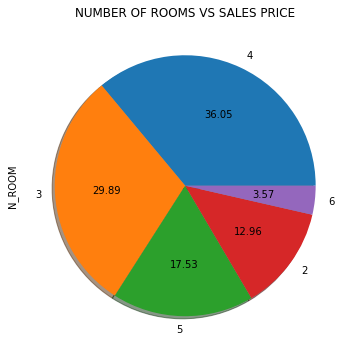

In [24]:
from matplotlib.patches import Shadow
plt.figure(figsize=(6,6))
df.N_ROOM.value_counts().plot(kind='pie',autopct='%.2f',shadow=True)
plt.title('NUMBER OF ROOMS VS SALES PRICE')
plt.show()

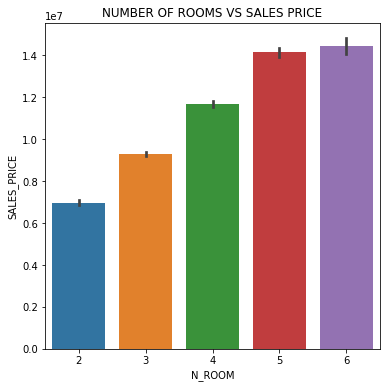

In [25]:
plt.figure(figsize=(6,6))
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)
plt.title('NUMBER OF ROOMS VS SALES PRICE')
plt.show()

In [26]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [27]:
#selecting  SALE_COND column and checking  replacing
df['SALE_COND'].replace('Adj Land','AdjLand',inplace=True)

df['SALE_COND'].replace({"Partiall":'Partial','PartiaLl':'Partial'},inplace=True)

df['SALE_COND'].replace('Ab Normal','AbNormal',inplace=True)

In [28]:
df.groupby(df['SALE_COND'])['SALE_COND'].count()

SALE_COND
AbNormal       1411
AdjLand        1439
Family         1403
Normal Sale    1423
Partial        1433
Name: SALE_COND, dtype: int64

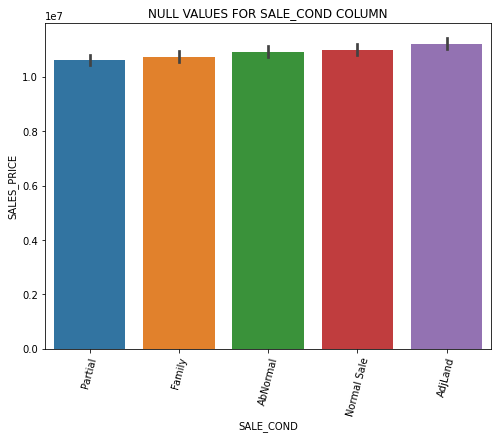

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title("NULL VALUES FOR SALE_COND COLUMN")
plt.xticks(rotation=75)
plt.show()

In [30]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [31]:
df['PARK_FACIL'].replace('Noo','No',inplace=True)

df.groupby(df['PARK_FACIL'])['PARK_FACIL'].count()

PARK_FACIL
No     3522
Yes    3587
Name: PARK_FACIL, dtype: int64

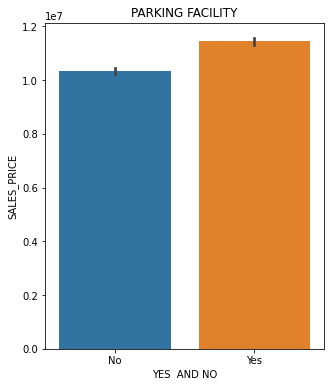

In [32]:
plt.figure(figsize=(5,6))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("PARKING FACILITY")
plt.xlabel("YES  AND NO")
plt.show()

In [33]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [34]:
df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'},inplace=True)

df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

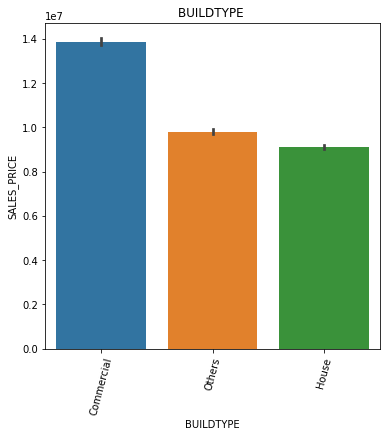

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)
plt.title("BUILDTYPE ")
plt.xticks(rotation=75)
plt.show()

In [36]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [37]:
df['UTILITY_AVAIL'].replace('All Pub','AllPub',inplace=True)

df.groupby(df['UTILITY_AVAIL'])['UTILITY_AVAIL'].count()

UTILITY_AVAIL
AllPub     1887
ELO        1522
NoSeWa     1871
NoSewr     1829
Name: UTILITY_AVAIL, dtype: int64

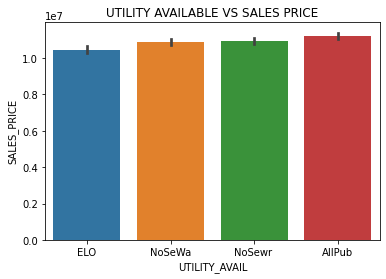

In [38]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("UTILITY AVAILABLE VS SALES PRICE")

plt.show()

In [39]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [40]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

df.groupby(df['STREET'])['STREET'].count()

STREET
Gravel       2520
No Access    2017
Paved        2572
Name: STREET, dtype: int64

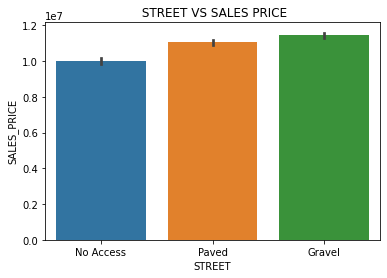

In [41]:
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title(" STREET VS SALES PRICE")

plt.show()

In [42]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

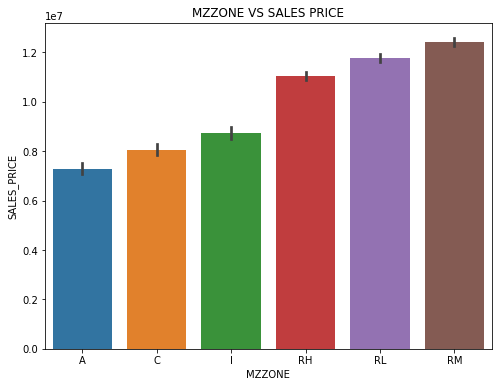

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE VS SALES PRICE')
plt.show()

# Convert  Object to DateTime Fromat

In [44]:
df.select_dtypes(['object'])

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Others,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


In [45]:
df[['DATE_BUILD','DATE_SALE']]

,DATE_BUILD,DATE_SALE
0,15-05-1967,04-05-2011
1,22-12-1995,19-12-2006
2,09-02-1992,04-02-2012
3,18-03-1988,13-03-2010
4,13-10-1979,05-10-2009
...,...,...
7104,15-01-1962,03-01-2011
7105,11-04-1995,08-04-2004
7106,01-09-1978,25-08-2006
7107,11-08-1977,03-08-2009


In [46]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])



In [47]:
df['YEAR_OF_HOUSE']=df['DATE_SALE'] - df['DATE_BUILD']

df['YEAR_OF_HOUSE']=df['YEAR_OF_HOUSE'] / np.timedelta64(1,'D')

df['YEAR_OF_HOUSE']

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: YEAR_OF_HOUSE, Length: 7109, dtype: float64

# LABEL ENCODER

In [48]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [49]:
df.select_dtypes(['int'])

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1,1,3,380000,144400,7600000
1,1986,26,2,1,5,760122,304049,21717770
2,909,70,1,1,3,421094,92114,13159200
3,1855,14,3,2,5,356321,77042,9630290
4,1226,84,1,1,3,237000,74063,7406250
...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,208767,107060,5353000
7105,1897,52,3,2,5,346191,205551,10818480
7106,1614,152,2,1,4,317354,167028,8351410
7107,787,40,1,1,2,425350,119098,8507000


In [50]:
df.select_dtypes(['object'])

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Velachery,Family,No,Others,NoSewr,Paved,I
4,P06210,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,AdjLand,No,Others,ELO,No Access,RM
7105,P10000,Velachery,Family,Yes,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,Normal Sale,No,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,Partial,Yes,Commercial,ELO,Paved,RL


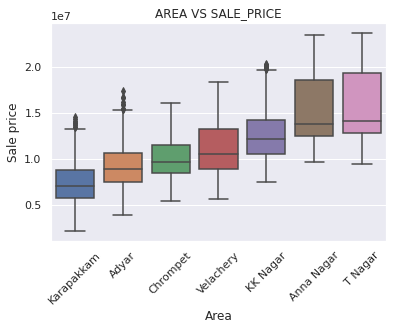

In [51]:
sns.set()
#x=df.groupby(df['SALES_PRICE'])
sns.boxplot(x=df.AREA,y=df.SALES_PRICE,data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
#sns.barplot(x=df.AREA,y=df.SALES_PRICE,data=df,order=result['AREA'])
plt.title('AREA VS SALE_PRICE')
plt.xlabel('Area')
plt.xticks(rotation=45)
plt.ylabel('Sale price')
plt.show()

In [52]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [53]:
df['AREA']=df['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

df['AREA']

0       1
1       6
2       2
3       4
4       1
       ..
7104    1
7105    4
7106    4
7107    1
7108    4
Name: AREA, Length: 7109, dtype: int64

In [54]:
df.select_dtypes(['object'])

,PRT_ID,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,AbNormal,Yes,Commercial,AllPub,Paved,A
1,P09411,AbNormal,No,Commercial,AllPub,Gravel,RH
2,P01812,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Family,No,Others,NoSewr,Paved,I
4,P06210,AbNormal,Yes,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...
7104,P03834,AdjLand,No,Others,ELO,No Access,RM
7105,P10000,Family,Yes,Others,NoSeWa,No Access,RH
7106,P09594,Normal Sale,No,House,NoSeWa,Gravel,I
7107,P06508,Partial,Yes,Commercial,ELO,Paved,RL


In [55]:
df['SALE_COND']=df['SALE_COND'].map({'AbNormal':1,'Family':2,'Partial':3,'AdjLand':4,'Normal Sale':5})

In [56]:
label=LabelEncoder()
# label.fit(df['PARK_FACIL'])
df['PARK_FACIL']=label.fit_transform(df['PARK_FACIL'])
df['PARK_FACIL'].unique()

array([1, 0])

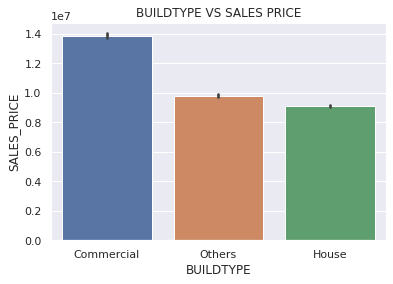

In [57]:

sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,data=df)
plt.title("BUILDTYPE VS SALES PRICE")
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')

plt.show()


In [58]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [59]:
onehot=OneHotEncoder(handle_unknown='ignore')

one_df=pd.DataFrame(onehot.fit_transform(df[['BUILDTYPE']]).toarray())
#df['BUILDTYPE']=onehot.fit(df.BUILDTYPE.reshape(-1,1))

#df['BUILDTYPE']=label.fit_transform(df['BUILDTYPE'])

df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [60]:
one_df.rename(columns={0:"Commercial",1:'Others',2:'House'})

df=df.join(one_df)

In [61]:
df=df.rename(columns={0:"Commercial",1:'Others',2:'House'})

In [62]:
df.select_dtypes(['object'])

,PRT_ID,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Commercial,AllPub,Paved,A
1,P09411,Commercial,AllPub,Gravel,RH
2,P01812,Commercial,ELO,Gravel,RL
3,P05346,Others,NoSewr,Paved,I
4,P06210,Others,AllPub,Gravel,C
...,...,...,...,...,...
7104,P03834,Others,ELO,No Access,RM
7105,P10000,Others,NoSeWa,No Access,RH
7106,P09594,House,NoSeWa,Gravel,I
7107,P06508,Commercial,ELO,Paved,RL


In [63]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [64]:
label.fit(df['UTILITY_AVAIL'])
df['UTILITY_AVAIL']=label.fit_transform(df['UTILITY_AVAIL'])
df['UTILITY_AVAIL'].unique()

array([0, 1, 3, 2])

In [65]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [66]:
df['STREET']=label.fit_transform(df.STREET)
df['STREET'].unique()

array([2, 0, 1])

In [67]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

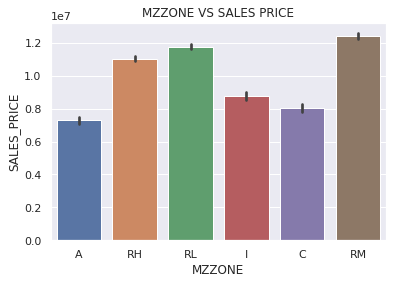

In [68]:
#result  = df.groupby(["AREA"])["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')
sns.set()

sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,data=df)
plt.title('MZZONE VS SALES PRICE')
plt.show()


In [69]:
df['MZZONE']=df['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   int64         
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   int64         
 9   PARK_FACIL     7109 non-null   int64         
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   int64         
 13  STREET         7109 non-null   int64         
 14  MZZONE         7109 non-null   int64         
 15  QS_ROOMS       7109 n

# Selecting Target and Features

In [71]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_OF_HOUSE', 'Commercial', 'Others', 'House'],
      dtype='object')

In [73]:
df[['QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']]

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


In [72]:
drop_col=['PRT_ID','DATE_SALE','DATE_BUILD','REG_FEE','BUILDTYPE','COMMIS']

x=df.drop(columns=drop_col,axis=1)

y=df.SALES_PRICE



In [74]:
y.shape

(7109,)

## split train and test

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

x_train.shape,x_test.shape

((5687, 20), (1422, 20))

## BUILD THE MODEL

In [78]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics


## Decision Tree Regressor

In [79]:
dt=DecisionTreeRegressor(max_depth=7).fit(x_train,y_train)
# Y Predict
y_pred=dt.predict(x_test)


In [80]:
Dt_score=metrics.r2_score(y_test,y_pred)
Dt_mae =metrics.mean_absolute_error(y_test,y_pred)
print('training score: {:.2f}'.format(dt.score(x_train,y_train)))
print('test score: {:.2f}'.format(dt.score(x_test,y_test)))
print('-----------------------------------------------')

print('R2_score : {:.2f}'.format(r2_score(y_test,y_pred)))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE : {:.2f}'.format(mean_squared_error(y_test,y_pred)))

training score: 1.00
test score: 1.00
-----------------------------------------------
R2_score : 1.00
MAE : 33993.62
MSE : 1877352695.64


In [81]:
dt_pred=pd.DataFrame({'Actual':y_test,
                      'predicted':y_pred})
dt_pred.head()

,Actual,predicted
461,15664740,1.576642e+07
3358,19286610,1.927660e+07
3751,13308490,1.331104e+07
2386,12496560,1.250077e+07
1125,9082000,9.093588e+06


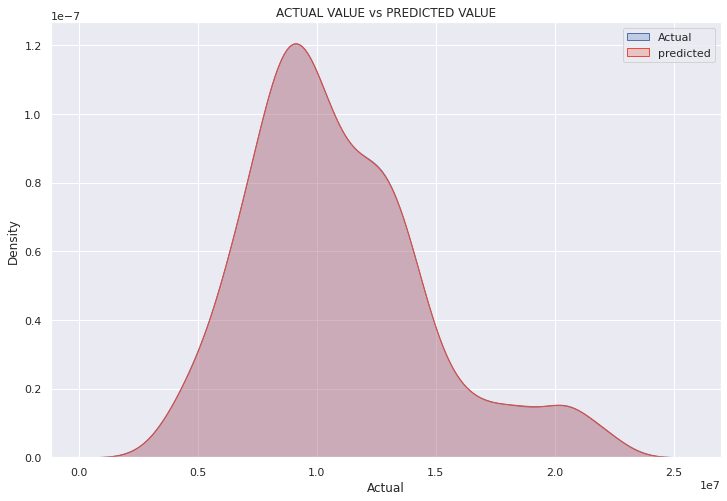

In [82]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dt_pred,x='Actual',label='Actual',shade=True)
sns.kdeplot(data=dt_pred,x='predicted',label='predicted',shade=True,color='#e74c3c')
plt.title('ACTUAL VALUE vs PREDICTED VALUE')
plt.legend()
plt.show()

## Random Forest Regressor

In [83]:
random_reg=RandomForestRegressor().fit(x_train,y_train)

random_reg.predict(x_test)

print('Training score : {:.2f}'.format(random_reg.score(x_train,y_train)))

print('Test score : {:.2f}'.format(random_reg.score(x_test,y_test)))

Training score : 1.00
Test score : 1.00


In [84]:
print('R2_score : {:.2f}'.format(r2_score(y_test,y_pred)))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE : {:.2f}'.format(mean_squared_error(y_test,y_pred)))

R2_score : 1.00
MAE : 33993.62
MSE : 1877352695.64


In [85]:
df_predict=pd.DataFrame({"Actual":y_test,
                          'Predicted':y_pred})
df_predict.head()

,Actual,Predicted
461,15664740,1.576642e+07
3358,19286610,1.927660e+07
3751,13308490,1.331104e+07
2386,12496560,1.250077e+07
1125,9082000,9.093588e+06


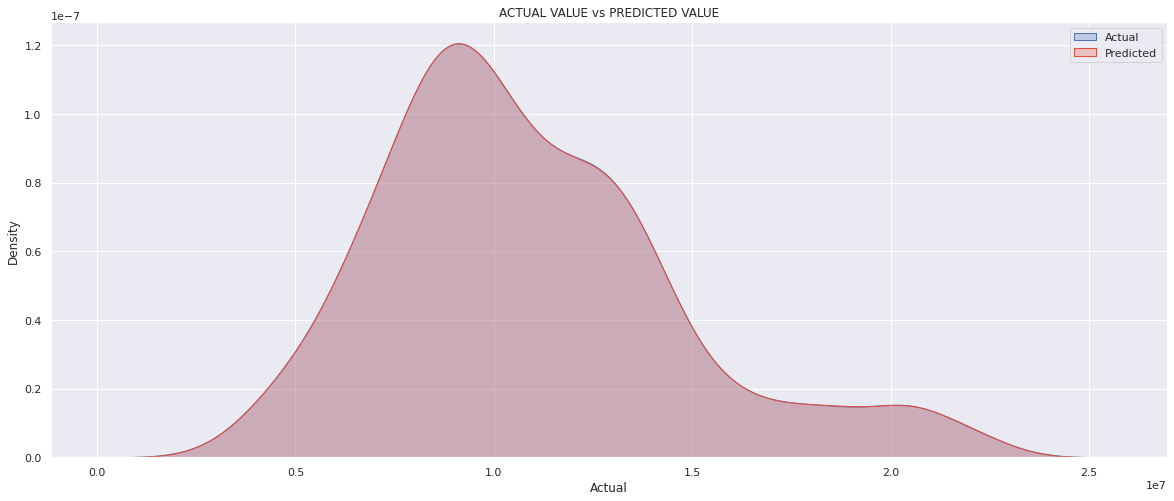

In [86]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=df_predict,x='Actual',label='Actual',shade=True)
sns.kdeplot(data=df_predict,x='Predicted',label='Predicted',shade=True,color='#e74c3c')
plt.title('ACTUAL VALUE vs PREDICTED VALUE')
plt.legend()
plt.show()

## KNNeighbors Regressor

In [87]:
neighbors=KNeighborsRegressor().fit(x_train,y_train)

neighbors.predict(x_test)

print('Training score : {:.2f}'.format(neighbors.score(x_train,y_train)))

print('Test score : {:.2f}'.format(neighbors.score(x_test,y_test)))

Training score : 1.00
Test score : 1.00


In [88]:
print('R2_score : {:.2f}'.format(r2_score(y_test,y_pred)))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE : {:.2f}'.format(mean_squared_error(y_test,y_pred)))

R2_score : 1.00
MAE : 33993.62
MSE : 1877352695.64


## Linear Regression

In [91]:
lr=LinearRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)

print('training score {:.2f}'.format(lr.score(x_train,y_train)))
print('test score {:.2f}'.format(lr.score(x_test,y_test)))

print('----------------------------------')
print('R2_score : {:.2f}'.format(r2_score(y_test,y_pred)))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE : {:.2f}'.format(mean_squared_error(y_test,y_pred)))

training score 1.00
test score 1.00
----------------------------------
R2_score : 1.00
MAE : 0.00
MSE : 0.00


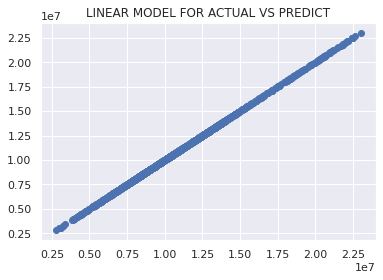

In [93]:
plt.scatter(y_pred,y_test)
plt.title("LINEAR MODEL FOR ACTUAL VS PREDICT")
plt.show()

## XG Boost Regressor

In [94]:
xg=XGBRegressor().fit(x_train,y_train)
y_pred=xg.predict(x_test)

print('r2 score: ', metrics.r2_score(y_test,y_pred))

[03:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.9999100815625505


In [96]:
# print('training score {:.2f}'.format(xg.score(x_train,y_train)))
# print('test score {:.2f}'.format(xg.score(x_test,y_test)))

print('----------------------------------')
print('R2_score : {:.2f}'.format(metrics.r2_score(y_test,y_pred)))
print('MAE : {:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE : {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred)))

----------------------------------
R2_score : 1.00
MAE : 26996.35
MSE : 1306963001.33


## Support Vector Machine

In [97]:
sv=SVR().fit(x_train,y_train)
y_predict=sv.predict(x_test)

print('r2 score: ', metrics.r2_score(y_test,y_predict))

r2 score:  -0.015827954919381382


In [790]:
print('training score {:.2f}'.format(sv.score(x_train,y_train)))
print('test score {:.2f}'.format(sv.score(x_test,y_test)))

print('----------------------------------')
print('R2_score : {:.2f}'.format(metrics.r2_score(y_test,y_predict)))
print('MAE : {:.2f}'.format(metrics.mean_absolute_error(y_test,y_predict)))
print('MSE : {:.2f}'.format(metrics.mean_squared_error(y_test,y_predict)))

training score -0.02
test score -0.03
----------------------------------
R2_score : -0.03
MAE : 2973224.76
MSE : 14955301726591.16


In [98]:
df_pred=pd.DataFrame({"Actual":y_test,
                       'predicted':y_predict})
df_pred.head()

,Actual,predicted
461,15664740,1.036738e+07
3358,19286610,1.036764e+07
3751,13308490,1.036699e+07
2386,12496560,1.036683e+07
1125,9082000,1.036613e+07


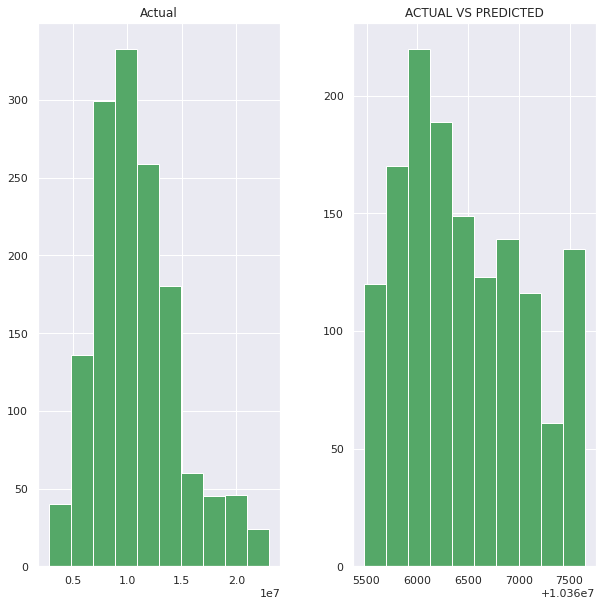

In [99]:
df_pred.hist(figsize=(10,10),color='g')
plt.title('ACTUAL VS PREDICTED')
plt.show()

In [ ]:
# plt.figure(figsize=(10,8))
# sns.displot(data=df_pred,x='Actual',label='Actual')
# sns.kdeplot(data=df_pred,x='predicted',label='Predicted',color='#e74c3c')
# plt.title('ACTUAL VS PREDICTED')
# plt.legend()
# plt.show()

##All model with one function 

In [102]:
models=[DecisionTreeRegressor(),RandomForestRegressor(),SVR(),KNeighborsRegressor(),XGBRegressor(),LinearRegression()]

In [103]:
def compare_model():
  for model in models:
    model.fit(x_train,y_train)

    training_test_data=model.predict(x_test)
    # MAE=mean_absolute_error(y_test,training_test_data)
    # MSE=mean_squared_error(y_test,training_test_data)

    # print(f'MEAN SQURE ERROR --> {model}  = {MSE}')
    # print()
    # print(f'MEAN ABSOLUTE ERROR --> {model}  = {MAE}')
    # print()
    r_Scores=r2_score(y_test,training_test_data)
    mae=mean_absolute_error(y_test,training_test_data)
    mse=mean_squared_error(y_test,training_test_data)
    print(f'{model} r2_score : {r_Scores}')
    print()
    print(f'{model} mean_absolute_error : {mae} ')
    print()
    print(f'{model} mean_squared_error : {mse} ')
    print("--------------------------------------")



In [104]:
compare_model()

DecisionTreeRegressor() r2_score : 0.9999917848064815

DecisionTreeRegressor() mean_absolute_error : 4998.966244725739 

DecisionTreeRegressor() mean_squared_error : 119407701.93389592 
--------------------------------------
RandomForestRegressor() r2_score : 0.9999963115124061

RandomForestRegressor() mean_absolute_error : 2855.7424050632767 

RandomForestRegressor() mean_squared_error : 53612106.17980274 
--------------------------------------
SVR() r2_score : -0.015827954919381382

SVR() mean_absolute_error : 2941113.5194912646 

SVR() mean_squared_error : 14765042525829.879 
--------------------------------------
KNeighborsRegressor() r2_score : 0.9999980051959145

KNeighborsRegressor() mean_absolute_error : 2488.6547116736992 

KNeighborsRegressor() mean_squared_error : 28994444.39451477 
--------------------------------------
[03:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() r2_score : 0.9